# Boston House Prices Prediction
- Kaggle 連結: https://www.kaggle.com/vikrishnan/boston-house-prices
    - 供參考用，本次作業使用 scikit-learn 內裝的 dataset

## 繳交規則

1. 請將**當前資料夾**命名為 `FDA_HW3_你的學號`
    - 例如：`FDA_HW3_F12345678`
    - 所有**英文**都必須**大寫**
    - 所有**文字**都必須在 **ASCII** 範圍
2. 請將本檔案命名為 `main.ipynb`
3. 請描述開發所需要的**環境**，包含：
    - **作業系統**與**發行版本**
        - 例如：Windows、Mac、Linux 等
        - 需要填寫系統**名稱**與**版本**
    - **程式執行環境**
        - 例如：jupyter、kaggle kernel、colab 等
        - 如果是 jupyter 請**填寫**版本
        - 如果是雲端計算資源**不需填寫**版本
        - 請**勿**使用**付費**資源，助教薪水**微薄**
    - **python 版本**
        - 例如：3.6.9
        - 填寫**至少**能執行的版本即可
    - **安裝環境**
        - 例如使用 `pip`、`conda` 等
        - 助教會以虛擬環境測試
    - **安裝套件**與**版本**
        - 請使用 `requirements.txt`
        - 助教會以虛擬環境測試
        - 請**不要**附上**多餘**的套件
    - **計算資源**
        - 使用 CPU **數量**
        - GPU 版本
    - **執行**所需花費**時間**
        - 請**不要更改**擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊
4. 請**保留執行結果**讓助教可以直接觀看
    - 請記得使用 **Save**
    - **雲端**計算資源請**儲存**後**下載**檔案
    - 所有程式區塊**必須依序執行**
    - 請**不要**保留**多餘**的程式區塊
5. 請**控制隨機亂數**讓實驗結果可以**重現**
    - 關鍵字：**random seed**
6. 請**不要**上傳**多餘**的檔案
    - 不要上傳**隱藏**檔案，包含 `.git`、`.ipynb_checkpoints` 等
    - 不要上傳**虛擬環境**
7. 請附上**參考連結**
    - 可以參考公開的 kernel
    - 沒附上連結者視同**瓢竊**
    - 使用的**演算法**請附上來源，並大致描述概念
8. 請**壓縮**成 `zip` 並上傳至 [moodle](http://moodle.ncku.edu.tw/)
    - 例如 `FDA_HW3_F12345678.zip`

## 評分標準

如果有參考其他作法卻沒有附上來源，則直接視為瓢竊，得分為 $-\infty$。

### 扣分標準

|規則|沒滿足規則失分|
|-|-|
|資料夾名稱符合繳交規則|-5|
|檔案名稱符合繳交規則|-5|
|填寫環境需求|-0|
|填寫計算資源|-0|
|提供 `requirements.txt`|-5|
|將資料夾壓縮成 `zip`|-5|
|不更改擁有註解 `請勿更動此區塊程式碼` 的程式碼區塊|-5|
|計算並顯示執行時間|-5|
|控制隨機亂數讓實驗結果可以重現|-5|

### 得分標準

|規則|滿足規則得分|
|-|-|
|在需要進行說明的cell以markdown語法進行說明|0|
|TODO #1: 整理資料|+5|
|TODO #2: 請進行統計各個 feature 的缺失值數目|+5|
|TODO #3: 利用 Seaborn 畫箱型圖|+10|
|TODO #4: 利用 Seaborn 進行 Heatmap 作圖|+10|
|TODO #5: 挑選特徵|+10|
|TODO #6: 呈現特徵分佈|+10|
|TODO #7: 切分資料|+10|
|TODO #8: 訓練 Linear Regression 模型|+10|
|TODO #9: 訓練 Random Forest Regressor 模型|+10|
|TODO #10: 參數調整|+10|
|TODO #11: 訓練 其他的 regression 模型|+10|
|(Bonus) TODO #12: 超越助教的分數|+10|

In [133]:
# 請勿更動此區塊程式碼

import time

EXECUTION_START_TIME = time.time() # 計算執行時間

In [134]:
# 載入必要套件

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd

## 載入資料

In [135]:
# 使用 scikit-learn 的資料

dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [136]:
# 觀察資料的 key 值有哪些

dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [137]:
print(dataset['data'].size)
dataset['data']

6578


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [138]:
print(dataset['target'].size)
dataset['target']

506


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [139]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [140]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [141]:
dataset['filename']

'boston_house_prices.csv'

In [142]:
dataset['data_module']

'sklearn.datasets.data'

## 資料前處理
### TODO #1: 
- 請將資料以 Pandas 整理成 DataFrame 的型式
- 欄位名稱為 feature_names

In [143]:
a = dataset['data'][:,1]
print(a)
'''for i in range(len(dataset['data'])):
  print(dataset['data'][i][1])'''

[ 18.    0.    0.    0.    0.    0.   12.5  12.5  12.5  12.5  12.5  12.5
  12.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.   75.   75.    0.    0.    0.    0.    0.    0.    0.
   0.    0.   21.   21.   21.   21.   75.   90.   85.  100.   25.   25.
  25.   25.   25.   25.   17.5  80.   80.   12.5  12.5  12.5   0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   25.   25.   25.   25.
   0.    0.    0.    0.    0.    0.    0.    0.   28.   28.   28.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    

"for i in range(len(dataset['data'])):\n  print(dataset['data'][i][1])"

In [144]:
df = pd.DataFrame(
    # Please put something here. 
  dataset.data, columns = dataset.feature_names

)
'''dataset['feature_names'][0] : dataset['data'][:,0],
dataset['feature_names'][1] : dataset['data'][:,1],
dataset['feature_names'][2] : dataset['data'][:,2],
dataset['feature_names'][3] : dataset['data'][:,3],
dataset['feature_names'][4] : dataset['data'][:,4],
dataset['feature_names'][5] : dataset['data'][:,5],
dataset['feature_names'][6] : dataset['data'][:,6],
dataset['feature_names'][7] : dataset['data'][:,7],
dataset['feature_names'][8] : dataset['data'][:,8],
dataset['feature_names'][9] : dataset['data'][:,9],
dataset['feature_names'][10] : dataset['data'][:,10],
dataset['feature_names'][11] : dataset['data'][:,11],
dataset['feature_names'][12] : dataset['data'][:,12],
'target' : dataset['target']'''

"dataset['feature_names'][0] : dataset['data'][:,0],\ndataset['feature_names'][1] : dataset['data'][:,1],\ndataset['feature_names'][2] : dataset['data'][:,2],\ndataset['feature_names'][3] : dataset['data'][:,3],\ndataset['feature_names'][4] : dataset['data'][:,4],\ndataset['feature_names'][5] : dataset['data'][:,5],\ndataset['feature_names'][6] : dataset['data'][:,6],\ndataset['feature_names'][7] : dataset['data'][:,7],\ndataset['feature_names'][8] : dataset['data'][:,8],\ndataset['feature_names'][9] : dataset['data'][:,9],\ndataset['feature_names'][10] : dataset['data'][:,10],\ndataset['feature_names'][11] : dataset['data'][:,11],\ndataset['feature_names'][12] : dataset['data'][:,12],\n'target' : dataset['target']"

In [145]:
print("Number of features: ", len(dataset.feature_names))

Number of features:  13


In [146]:
df['MEDV'] = dataset.target

In [147]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### TODO #2: 請進行統計各個 feature 的缺失值數目

In [148]:
# Please use some functions of Pandas here.
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

## 觀察資料的特性

### TODO #3: 利用 Seaborn 畫箱型圖，並進行說明
- 觀察每一個 features 的數值分佈
- 可以用來決定是否要對資料的數值進行標準化

有些數據有很多極端資料，所以我將數據標準化後又做了一張圖，
對於模型訓練有些許幫助

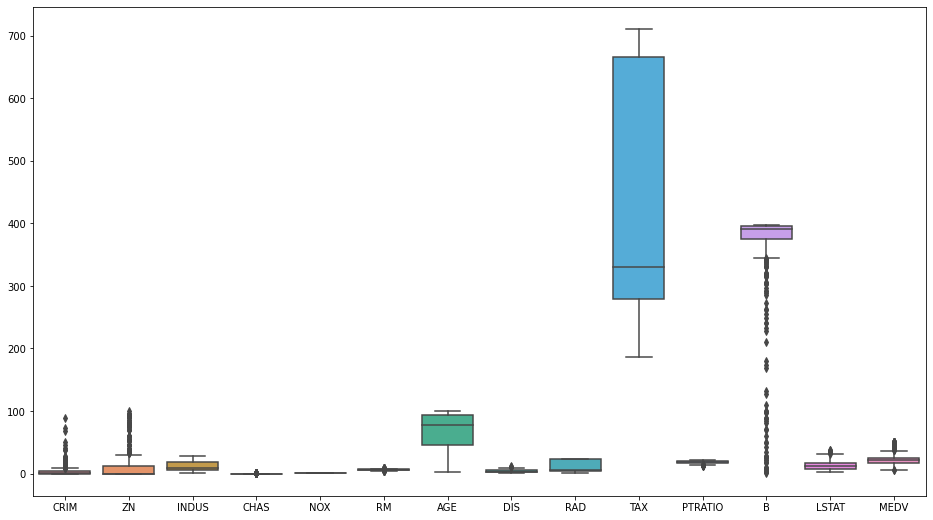

In [150]:
from locale import normalize
plt.figure(figsize=(16, 9))
# Plot a boxplot with Seaborn
plt.title = "Boston House Price"
sns.boxplot(data = df)

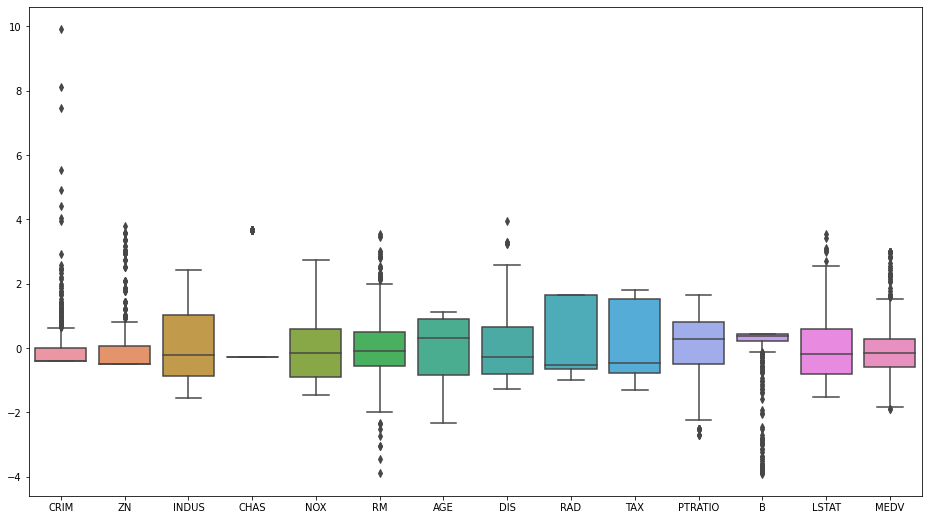

In [151]:
plt.figure(figsize=(16, 9))
# Plot a boxplot with Seaborn
plt.title = "Boston House Price"
normalize_df = (df - df.mean()) / df.std()
#sns.boxplot(data = df)
sns.boxplot(data = normalize_df)

### TODO #4: 利用 Seaborn 進行 Heatmap 作圖，並進行說明
- 觀察每一個特徵與房價 (MEDV) 的關聯程度
- 使用 dr.corr() 來計算 feature 和 feature 之間的關係係數
- 數值愈高表示愈正相關，數值愈低表示愈負相關

Heatmap有效的展示出相關性，以顏色深淺作為辨別。
越接近1有越大的正相關，反之，越接近-1有越大的負相關

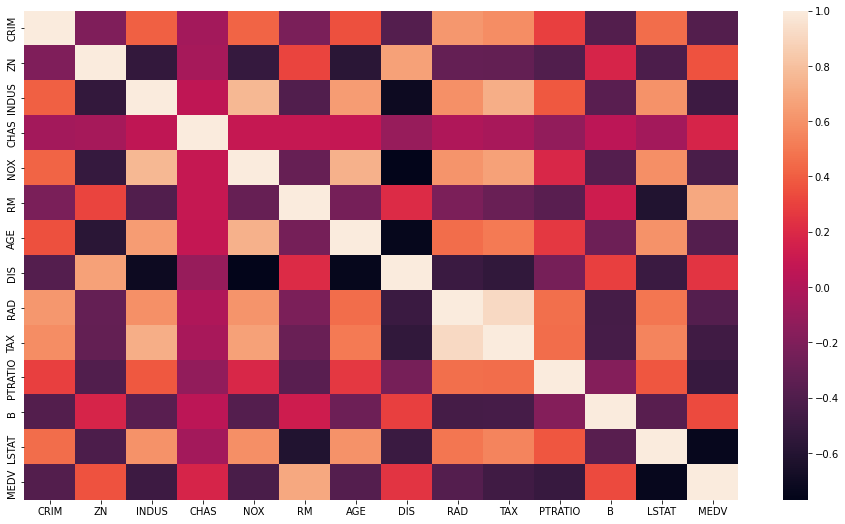

In [152]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.

# Plot a heatmap with Seaborn
sns.heatmap(df.corr())

In [153]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### TODO #5: 挑選特徵，並進行說明
- 觀察 heatmap 中具有"顯著"正相關或是"顯著"負相關的特徵
- 把這些特徵進行 concatenation，得到新的 dataframe

我挑選特徵的方式是由越接近+1及-1的先選，但是我發現只選二到三個參數loss無法下降，因此我後來總共挑了12個特徵作為輸入

In [154]:
X = pd.DataFrame(np.c_[df.CRIM, df.ZN, df.INDUS, df.NOX, df.RM, df.AGE,
    df.DIS, df.RAD, df.TAX, df.PTRATIO, df.B, df.LSTAT], # Please put features inside the bracket
      columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] # Please put feature names here 
        )
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### TODO #6: 呈現特徵分佈，並進行說明
- 把你選取到的"重要特徵"進行subplots，畫出散佈圖 (scatter plots)
- 每一張圖的X軸是你選到的特徵、Y軸是房價('MEDV')

由圖可以看出各項數據對於房價的分布圖

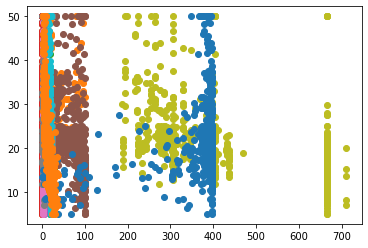

In [155]:
# Please plot subplots here
data_x = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
plt.scatter( df.CRIM, df.MEDV)
plt.scatter( df.ZN, df.MEDV)
plt.scatter( df.INDUS, df.MEDV)
plt.scatter( df.NOX, df.MEDV)
plt.scatter( df.RM, df.MEDV)
plt.scatter( df.AGE, df.MEDV)
plt.scatter( df.DIS, df.MEDV)
plt.scatter( df.RAD, df.MEDV)
plt.scatter( df.TAX, df.MEDV)
plt.scatter( df.PTRATIO, df.MEDV)
plt.scatter( df.B, df.MEDV)
plt.scatter( df.LSTAT, df.MEDV)

## 訓練模型前的準備
### TODO #7: 切分資料
- 利用 train_test_split，將資料切成 train set 和 test set
- 設定 train set 的比例為全部資料的 80%
- 請記得設定 random_state 以控制隨機過程

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, df.MEDV, test_size = 0.2, random_state = 9487)

print(X_train.shape) #(404, 2)
print(X_test.shape) #(102, 2)
print(Y_train.shape) #(404, )
print(Y_test.shape) #(102, )

(404, 12)
(102, 12)
(404,)
(102,)


## 訓練模型並進行評估

### TODO #8: 訓練 Linear Regression 模型，並說明訓練結果
- 利用 scikit-learn，將資料 fit 在 LinearRegression
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

由結果圖來看，其中的點有接近線性回歸的概念

In [157]:
# Modeling
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression(fit_intercept=True)

model_LR.fit(X_train, Y_train)

print("Model slope:    ", model_LR.coef_)
print("Model intercept:", model_LR.intercept_)

Model slope:     [-1.11466430e-01  4.66512470e-02  3.18705849e-02 -1.66679788e+01
  3.41601502e+00  2.96284208e-03 -1.51461548e+00  3.23461918e-01
 -1.40788793e-02 -9.91769086e-01  9.25379152e-03 -5.38131769e-01]
Model intercept: 39.804096574095176


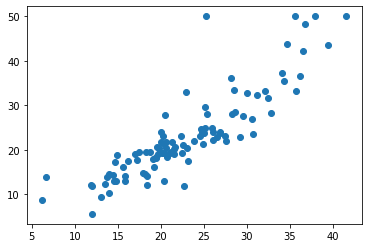

In [158]:
# plotting the y_test vs y_pred

Y_pred = model_LR.predict(X_test)
Y_true = Y_test
plt.scatter(Y_pred, Y_true)

### TODO #9: 訓練 Random Forest Regressor 模型
- 利用 scikit-learn，將資料 fit 在 RandomForestRegressor 模型
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

In [159]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [160]:
# Modeling

model_RFR = ensemble.RandomForestRegressor(random_state = 9487)
model_RFR.fit(X_train, Y_train)


RandomForestRegressor(random_state=9487)

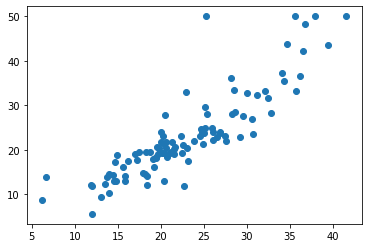

In [161]:
# plotting the y_test vs y_pred

y_pred = model_RFR.predict(X_test)
Y_true = Y_test
plt.scatter(Y_pred, Y_true)


### TODO #10: 參數調整，並進行說明
- 請嘗試使用 Grid search 來進行調參
    - 可以自己寫 for-loop
    - 或是使用 sklearn.model_selection 中的 GridSearchCV 函式

我調了很多參數，全部都在程式的註解裡，
我查了一些參考範圍的值再自行微調。

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
RFreg = RandomForestRegressor()
params = {
  'n_estimators': [200],#[100,200,300],#int
  'criterion': ['absolute_error'],#['squared_error', 'absolute_error', 'poisson'],
  'max_depth': [None],#int #None感覺比較好
  'min_samples_split': [2],#[2,3,4],#int or float #int
  'min_samples_leaf': [3],#[1,2,3],#int or float #int
  'min_weight_fraction_leaf': [0.0],#[0.0,0.1,0.2],#float
  'max_features': ['sqrt'],#['auto', 'sqrt', 'log2'],
  'max_leaf_nodes': [None],#int
  'min_impurity_decrease': [0.0],#float #待研究
  'bootstrap': [True],
  'oob_score': [False],#[False,True],#Only available if bootstrap=True
  'n_jobs': [-1],#[-1,1,2],#int #-1 means using all processors 1==None
  'random_state': [9487],
  'verbose': [0],#int
  'warm_start': [False],
  'ccp_alpha': [0.0],#non-negative float
  'max_samples': [None]#int or float
 }
gridsearch=GridSearchCV(RFreg, params, cv=5, return_train_score=True, error_score='raise')
gridsearch.fit(X_train, Y_train)

print(gridsearch.best_params_)

'''
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}
MSE: 20.53 R2: 0.78 cv=10

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}
test_MSE: 20.50 test_R2: 0.78 cv=5

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}
test_MSE: 20.33 test_R2: 0.78 cv=5
'''

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}


"\n{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}\nMSE: 20.53 R2: 0.78 cv=10\n\n{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 9487, 'verbose': 0, 'warm_start': False}\ntest_MSE: 20.50 test_R2: 0.78 cv=5\n\n{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity

In [164]:
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
best_estim = gridsearch.best_estimator_

ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,Y_train)
r2 = r2_score(ytr_pred,Y_train)

print("train_MSE: %.2f" % mse)
print("train_R2: %.2f" % r2)

ypred=best_estim.predict(X_test)
mse = mean_squared_error(Y_test, ypred)
r2 = r2_score(Y_test, ypred)

print("test_MSE: %.2f" % mse)
print("test_R2: %.2f" % r2)

train_MSE: 6.73
train_R2: 0.89
test_MSE: 14.73
test_R2: 0.84


### TODO #11: 訓練 其他的 regression 模型，與上述兩種模型比較並說明訓練結果
- 將資料 fit 在其他的迴歸模型，可選擇 SVR、XGBRegressor 或其他...
- 利用 TODO #10 的工具來進行參數調整
- 將結果繪製成散佈圖 (scatter plot)，其中 X軸 為 Y_pred、Y軸為 Y_true

我嘗試了使用svr模型但是成效不佳，最後是採取XGBRegressor實作。
藉由xgboost能夠將test r2由0.84提升至0.90，效果顯著

In [165]:
'''import itertools
list(itertools.combinations([1,2,3,4],3))'''

'import itertools\nlist(itertools.combinations([1,2,3,4],3))'

In [166]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
  'seed': 9487,
  'objective': 'reg:squarederror',
}
XGBreg = xgb.XGBRegressor(**params)
cv_params = {
  'n_estimaters': [100],#[100,105,95],
  'learning_rate': [0.08],#[0.1,0.09,0.08], #[0，1]
  'gamma': [1],#[0,1], #min_split_loss [0，∞]
  'max_depth': [5],#[6,5,7], #[0，∞]
  'min_child_weight': [1],#[1,2,0], #[0，∞]
  'max_delta_step': [0],#[0,1], #[0，∞]
  'subsample': [0.845],#[0.845,0.85,0.855], #(0,1]
  'colsample_bytree': [0.76],#[0.76,0.755,0.765], #(0,1]
  'colsample_bylevel': [0.5],#[0.5,0.51,0.49], #(0,1]
  'reg_lambda': [1],
  'reg_alpha': [0],
  'scoring': ['neg_mean_squared_error'],#['neg_mean_squared_error','r2']          
}
gridsearch=GridSearchCV(XGBreg, cv_params, cv=5, return_train_score=True, error_score='raise')
gridsearch.fit(X_train, Y_train)

print(gridsearch.best_params_)

'''
ALL
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.75}
train_MSE: 0.661382
train_R2: 0.991669
test_MSE: 11.387091
test_R2: 0.876254

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.09, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.85}
train_MSE: 0.324242
train_R2: 0.995964
test_MSE: 10.799164
test_R2: 0.882643

no normalized data
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.76, 'gamma': 0, 'learning_rate': 0.09, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scoring': 'neg_mean_squared_error', 'subsample': 0.85}
train_MSE: 0.352243
train_R2: 0.995605
test_MSE: 10.741136
test_R2: 0.883274

NO CHAS
{'colsample_bylevel': 0.5, 'colsample_bytree': 0.76, 'gamma': 1, 'learning_rate': 0.08, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scoring': 'neg_mean_squared_error', 'subsample': 0.845}
train_MSE: 0.865374
train_R2: 0.988968
test_MSE: 9.066438
test_R2: 0.901473
'''

{'colsample_bylevel': 0.5, 'colsample_bytree': 0.76, 'gamma': 1, 'learning_rate': 0.08, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scoring': 'neg_mean_squared_error', 'subsample': 0.845}


"\nALL\n{'colsample_bylevel': 0.5, 'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.75}\ntrain_MSE: 0.661382\ntrain_R2: 0.991669\ntest_MSE: 11.387091\ntest_R2: 0.876254\n\n{'colsample_bylevel': 0.5, 'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.09, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.85}\ntrain_MSE: 0.324242\ntrain_R2: 0.995964\ntest_MSE: 10.799164\ntest_R2: 0.882643\n\nno normalized data\n{'colsample_bylevel': 0.5, 'colsample_bytree': 0.76, 'gamma': 0, 'learning_rate': 0.09, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'n_estimaters': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'scoring': 'neg_mean_squared_error', 'subsample': 0.85}\ntrain_MSE: 0.352243\ntrain_R2: 0.995605\ntest_MSE: 10.741136\ntest_R2: 0.883274\n\nNO CHAS\n{'colsample_

In [167]:
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
best_estim = gridsearch.best_estimator_

ytr_pred=best_estim.predict(X_train)
mse = mean_squared_error(ytr_pred,Y_train)
r2 = r2_score(ytr_pred,Y_train)

print("train_MSE: %f" % mse)
print("train_R2: %f" % r2)

ypred=best_estim.predict(X_test)
mse = mean_squared_error(Y_test, ypred)
r2 = r2_score(Y_test, ypred)

print("test_MSE: %f" % mse)
print("test_R2: %f" % r2)

train_MSE: 0.865374
train_R2: 0.988968
test_MSE: 9.066438
test_R2: 0.901473


### (Bonus) TODO #12: 超越助教的分數，並且說明如何做到
- R2:  0.8831229012211493
- Test loss (MSE):  9.150760226336033

增加參數輸入，由高度相關依序加入，再依據數據特徵微調參數輸入

In [168]:
# 請勿更動此區塊程式碼

EXECUTION_END_TIME = time.time() # 計算執行時間
print('total execution time: {}'.format(EXECUTION_END_TIME - EXECUTION_START_TIME))

total execution time: 10.326520204544067
